# Importing the necessary packages

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

# Load the dataset

In [3]:
data = pd.read_csv('Coursera.csv')
print("Dataset has been read successfully")

Dataset has been read successfully


# EDA and data preprocessing

In [4]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [5]:
data.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [7]:
data.duplicated().sum()

98

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data['University'].value_counts()

University
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
University of Michigan                        101
Johns Hopkins University                      101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: count, Length: 184, dtype: int64

In [11]:
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: count, dtype: int64

In [12]:
data = data[data['Difficulty Level']!='Not Calibrated']
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner        1406
Advanced         991
Intermediate     823
Conversant       154
Name: count, dtype: int64

In [13]:
data['Course Rating'].value_counts()

Course Rating
4.7               696
4.6               588
4.8               579
4.5               377
4.4               231
4.9               172
4.3               153
4.2               119
5                  89
4.1                85
Not Calibrated     80
4                  49
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: count, dtype: int64

In [14]:
data = data[data['Course Rating']!='Not Calibrated']
data['Course Rating'] = data['Course Rating'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else 0.0)
data['Course Rating'].value_counts()

Course Rating
4.7    696
4.6    588
4.8    579
4.5    377
4.4    231
4.9    172
4.3    153
0.0    153
4.2    119
4.1     85
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
3.1      1
2.5      1
1.9      1
2.3      1
Name: count, dtype: int64

In [15]:
data['Course URL'].value_counts()

Course URL
https://www.coursera.org/learn/write-a-feature-length-screenplay-for-film-or-television    1
https://www.coursera.org/learn/fitting-statistical-models-data-python                      1
https://www.coursera.org/learn/system-programming                                          1
https://www.coursera.org/learn/python-analysis                                             1
https://www.coursera.org/learn/disability-awareness                                        1
                                                                                          ..
https://www.coursera.org/learn/art-science-ml                                              1
https://www.coursera.org/learn/psychosocial-spiritual-aspects-palliative-care              1
https://www.coursera.org/learn/analyze-data-plotly-python                                  1
https://www.coursera.org/learn/data-collection-analytics-project                           1
https://www.coursera.org/learn/deploying-secure-kubernetes-

In [16]:
data['Skills'].value_counts()

Skills
Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art                                                                       1
multilevel model  linearity  modeling  Regression  statistical models  Computer Programming  Bayesian  Bayesian Statistics  General Statistics  Python Programming data-science probability-and-statistics             1
file system  System Programming  Computer Programming  generation  Mainframe  language  shell (computing)  ibm cobol  application layer  application service provider information-technology support-and-operations    1
Data Visualization  jpeg  dict  Python Programming  Data Analysis  web scraping  analysis  nest  Computer Programming  recursion computer-science software-development                                                 1
documents  education  Planning  Critical Thinking  college  disability studies  gratitude  resource  fundraising  Special Edu

# Data Visualization
## As data has been cleaned and processed now we can move on with the next part that is data visualization

In [17]:
import matplotlib.pyplot as plt

## No of courses under each difficulty level

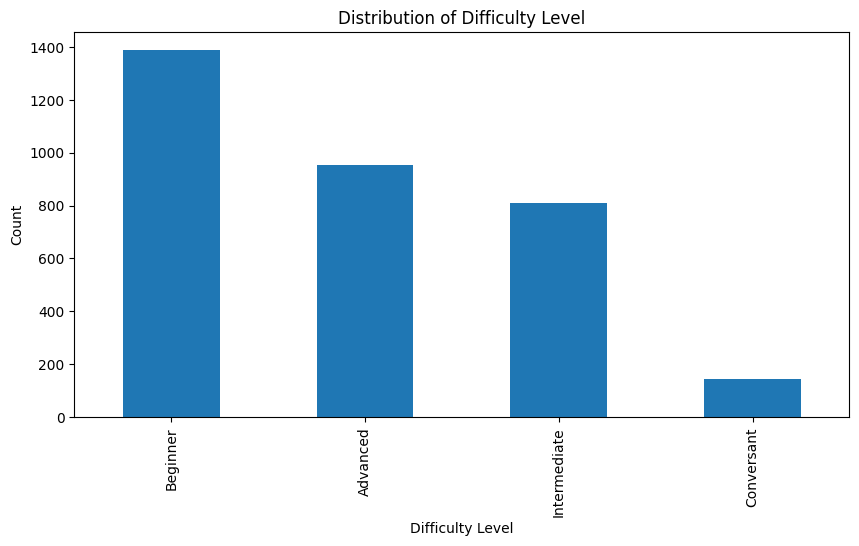

In [18]:
# Plotting the distribution of difficulty level
plt.figure(figsize=(10,5))
plt.title('Distribution of Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
data['Difficulty Level'].value_counts().plot(kind='bar')
plt.show()

## Distribution of course ratings

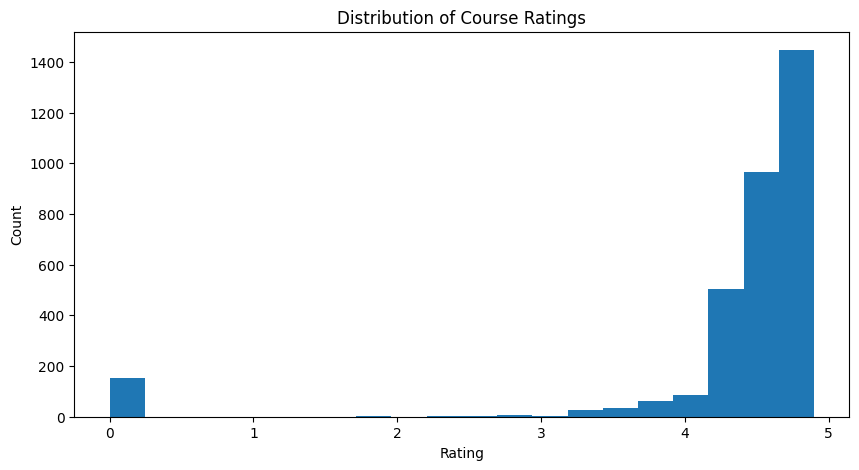

In [19]:
plt.figure(figsize=(10,5))
plt.hist(data['Course Rating'],bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Encoding categorical values

In [20]:
label_encoder = LabelEncoder()
data['Difficulty Level'] = label_encoder.fit_transform(data['Difficulty Level'])

In [21]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
text_features = tfidf_vectorizer.fit_transform(data['Course Description'] + ' ' + data['Skills'])

# Model building

In [22]:
knn_model = NearestNeighbors(n_neighbors=30, metric='cosine')
knn_model.fit(text_features)

NearestNeighbors(metric='cosine', n_neighbors=30)

In [23]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,1,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,1,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,0,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,3,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,1,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [24]:
X = text_features
y = data['Course Rating'] >= data['Course Rating'].median()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The recommender function

In [25]:
data.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [26]:
def recommend_knn(course_index):
    distances, indices = knn_model.kneighbors(text_features[course_index])
    recommended_courses = data.iloc[indices[0]]
    return recommended_courses

In [29]:
# Assuming the user input is stored in a variable called 'user_input'
user_input = input("Enter your search query: ")

result_index = data[data['Course Name'].str.contains(user_input, case=False)].index
if not result_index.empty:
    first_index = result_index[0]
    # print(data.loc[first_index])
else:
    print("No matching results found.")

# print(first_index)

recommendations = recommend_knn(first_index)

# Displaying recommendations as a dataframe
df_recommendations = pd.DataFrame(recommendations)
df_recommendations.sort_values(by='Difficulty Level', ascending=True, inplace=True)
df_recommendations.head()


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
1025,Introduction to Programming and Animation with...,Duke University,0,4.4,https://www.coursera.org/learn/introtoalice,This course is an introductory programming cou...,storyboarding euler's totient function game ...
3505,"Programming Languages, Part C",University of Washington,0,0.0,https://www.coursera.org/learn/programming-lan...,"[As described below, this is Part C of a 3-par...",euler's totient function Computer Programming...
1930,"Programming Languages, Part B",University of Washington,0,4.9,https://www.coursera.org/learn/programming-lan...,"[As described below, this is Part B of a 3-par...",type system ordered pair small (programming ...
2281,Introduction to Computer Programming,University of London,0,4.1,https://www.coursera.org/learn/introduction-to...,This MOOC provides you with the foundational s...,c programming Computer Programming node.js ...
2218,"Problem Solving, Python Programming, and Video...",University of Alberta,0,4.2,https://www.coursera.org/learn/problem-solving...,This course is an introduction to computer sci...,modulo operation intrinsic function test pla...


In [28]:
from sklearn.metrics import accuracy_score
knn_predictions = []
for i in range(X_test.shape[0]):
    distances, indices = knn_model.kneighbors(X_test[i])
    knn_predictions.append(data.iloc[indices[0]]['Course Rating'].mean() >= 4.0)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy Score:", knn_accuracy)


KNN Accuracy Score: 0.5948406676783005
